In [3]:
import numpy as np
import sys
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

In [4]:
Δz,B,L = 10,50,500
P0,ρ0 = 120e5,1000
сf = 1e-9
k,μ,φ = 1e-14,1e-3,0.2

$ρ = ρ_{0}*(1 + c_{f}*(P - P_{0}))$

In [5]:
def ρ(P):
    return ρ0 * (1.0 + сf * (P - P0))

1)Задание начальных данных:

In [6]:
N = 101 # N узлов
T = 864000 # Т секунд
τ = 3600   # τ секунд
Pinj = 1.52e+7   # Pinj в ПА
Pprod = 5.066e+6 # Pprod в ПА
P_0 = 1.013e+7   # P_0 в ПА

2)Генерация сетки:

In [7]:
t = 0
h = L / N
X = np.linspace(0,500,101)
p = np.zeros(N)
Q , K = np.zeros(N), np.zeros(N)
a, b, c, d = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
data = np.zeros((81,N))
p[0] = Pinj
for i in range(1,N-1):
    p[i] = P_0
p[N - 1] = Pprod
data[0][:] = p

3)В цикле по времени:

In [8]:
while t < T-τ:
#рассчитываются коэффициенты матрицы 
    a[0] = 1.0
    b[0] = 0.0
    d[0] = Pinj
    for i in range(1,N-1):
        c[i] = k * (ρ(p[i]) if p[i] >= p[i+1] else ρ(p[i+1])) / (μ*h*h)
        b[i] = k * (ρ(p[i-1]) if p[i-1] >= p[i] else ρ(p[i])) / (μ*h*h)
        a[i] = - c[i] - b[i] - (φ * сf * ρ0 / τ)
        d[i] = - (φ * сf * ρ0 / τ) * p[i];
    a[N - 1] = 1.0
    c[N - 1] = 0.0
    d[N - 1] = Pprod
#методом прогонки находится решение системы
   ##Прямой ход прогонки
    Q[1] = - b[0] / a[0]
    K[1] = d[0] / a[0]
    for i in range(1,N-2):
        Q[i + 1] = - b[i] / (c[i] * Q[i] + a[i])
        K[i + 1] = (d[i] - c[i] * K[i]) / (c[i] * Q[i] + a[i])
    #Обратный ход прогонки
    p[N - 1] = (d[N - 1] - c[N - 1] * K[N - 1]) / (c[N - 1] * Q[N - 1] + a[N - 1])
    for i in range (N-1,0,-1):
        p[i - 1] = Q[i] * p[i] + K[i]
    ##запись результатов(каждые 3 часа)
    if(t%10800 == 0):
        data[int(t/10800)][:] = p
# инкрементирование времени
    t += τ

<IPython.core.display.Javascript object>


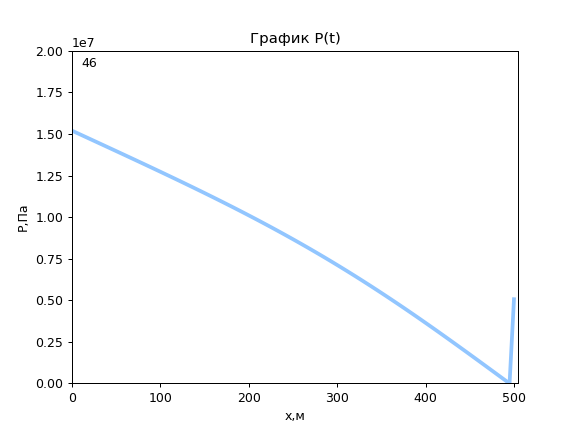

In [9]:
%matplotlib notebook
plt.style.use('seaborn-pastel')

fig = plt.figure()
ax = plt.axes(xlim=(0, 505), ylim=(0, 2e7))
ax.set_ylabel("P,Па")
ax.set_xlabel("x,м")
plt.title('График P(t)') 
line, = ax.plot([], [], lw=3)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    time_text.set_text('')
    line.set_data([], [])
    return line,
def animate(i):
    x = X
    y = data[i]
    time_text.set_text(i)
    line.set_data(x, y)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=80, interval=300, blit=True)
anim.save('график P(t).gif', writer='imagemagick')